In [7]:
#####################################################################
#### In Zhu et al. 2021, I have collected these opacities from the literature. 
#### If you need to use them, please cite the origional paper and the appropriate references within
####
#### Dust Opacity: Birnstiel et al. 2018, ApJ, 869, L45
#### Molecular Opacity: Freedman et al. 2014, ApJS, 214, 25 
####                 Note that for high density, we blindly use/extend the analytical fit which can be inaccurate. 
####                 This leads to a molecular opacity higher than dust opacity at high density and low temperature (<~1000 K), which may not be physical.
#### Atomic Opacity: Colgan et al. 2016, ApJ, 817, 116
######################################################################

# read in library and constants

import numpy as np, os, sys
import matplotlib.pylab as p
from pylab import *


In [20]:
# you can choose different opacity files to read in

#filename="opacitysolar09dustq3p5amax0p001new.txt"   #amax=0.001 cm  
#filename="opacitysolar09dustq3p5amax1new.txt"   #amax=1 cm  
#filename="opacitysolar09dustq3p5amax10new.txt"   #amax=10 cm  
filename="opacitysolar09dustq3p5amax0p1new.txt"   #amax=0.1 cm

#filename="opacitysolar09M1dustq3p5amax0p001new.txt"   #amax=0.001 cm, [M/H]=1 (10 solar metallicity)
#filename="opacitysolar09M1dustq3p5amax1new.txt"   #amax=1 cm, [M/H]=1  
#filename="opacitysolar09M1dustq3p5amax10new.txt"   #amax=10 cm, [M/H]=1    
#filename="opacitysolar09M1dustq3p5amax0p1new.txt"   #amax=0.1 cm, [M/H]=1  

with open(filename,'r') as fp:
    line=fp.readline()
    numbers_str = line.split()
    nrho=int(numbers_str[1])
    nt=int(numbers_str[3])
    rhoread=np.zeros(nrho)
    treadnew=np.zeros(nt)
    rosscombineread=np.zeros([nt,nrho])
    planckcombineread=np.zeros([nt,nrho])
    for irho in range(nrho):
        for it in range(nt):
            line=fp.readline()
            numbers_str = line.split()
            rhoread[irho]=float(numbers_str[0])
            treadnew[it]=float(numbers_str[1])
            rosscombineread[it,irho]=float(numbers_str[2])
            planckcombineread[it,irho]=float(numbers_str[3])
  

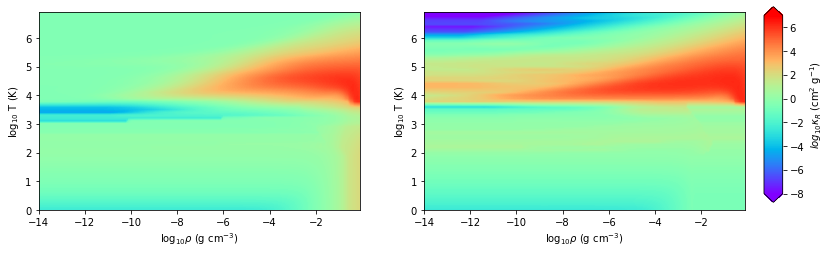

In [21]:
fig = figure(figsize = (13,8))
ax = fig.add_subplot(221)

plt.contourf(np.log10(rhoread), np.log10(treadnew), np.log10(rosscombineread),levels=np.linspace(-8.,7.,255),cmap='rainbow')
plt.xlabel(r'log$_{10}\rho$ (g cm$^{-3}$)')
plt.ylabel(r'log$_{10}$ T (K)')

ax = fig.add_subplot(222)

cont=plt.contourf(np.log10(rhoread), np.log10(treadnew), np.log10(planckcombineread),levels=np.linspace(-8.,7.,255),cmap='rainbow',extend="both")
plt.xlabel(r'log$_{10}\rho$ (g cm$^{-3}$)')
plt.ylabel(r'log$_{10}$ T (K)')

fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.55, 0.02, 0.34])
cbar= fig.colorbar(cont, cax=cbar_ax,ticks=[-8, -6, -4, -2, 0, 2, 4, 6])
cbar.set_label(r'$log_{10}\kappa_R$ (cm$^2$ g$^{-1}$)')

plt.show()

In [23]:
# Python programs to do interpolation 
opacityinter = interpolate.interp2d(np.log10(rhoread), np.log10(treadnew), np.log10(rosscombineread), kind='linear')

opacityplanckinter = interpolate.interp2d(np.log10(rhoread), np.log10(treadnew), np.log10(planckcombineread), kind='linear')

def opac(rho,T):
    logt=np.log10(T)
    logrho=np.log10(rho)
    opac=10.**opacityinter(logrho,logt)
    return opac

def opacplanck(rho,T):
    logt=np.log10(T)
    logrho=np.log10(rho)
    opac=10.**opacityplanckinter(logrho,logt)
    return opac